# Feature Engineering

In [ ]:
import matplotlib as plt
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') # 폰트 적용

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/income_predict/data/"

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv(f"{DATA_PATH}train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트 데이터

train.shape, test.shape

((20000, 23), (10000, 22))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 연속형 변수, 이산형 변수 추출
train_int = train[train.describe().columns]
train_str = train[train.columns.difference(train.describe().columns)]

test_int = test[test.describe().columns]
test_str = test[test.columns.difference(test.describe().columns)]

train_int.shape, test_int.shape

((20000, 6), (10000, 5))

- Age,Working_Week (Yearly),Dividends,Net Profit,Net_Earning_per_Working_Year,Net_Profit_per_gain,Losses,Net_profit_per_Loss
- Total Amount,Working_Week(Yearly),Dividends,Age

In [ ]:
# Net Profit

train['Net_Profit'] = train['Gains'] - train['Losses'] + train['Dividends']
test['Net_Profit'] = test['Gains'] - test['Losses'] + test['Dividends']

train.shape,test.shape

((20000, 24), (10000, 23))

In [ ]:
# Total Amount

train['Total_Amount'] = train['Gains'] + train['Losses'] + train['Dividends']
test['Total_Amount'] = test['Gains'] + test['Losses'] + test['Dividends']

train.shape,test.shape

((20000, 25), (10000, 24))

In [ ]:
# Dividend Yield

train['Dividend_Yield'] = train['Dividends'] / (train['Total_Amount'].replace(0,1))
test['Dividend_Yield'] = test['Dividends'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 26), (10000, 25))

In [ ]:
# Gains Ratio

train['Gains_Ratio'] = train['Gains'] / (train['Total_Amount'].replace(0,1))
test['Gains_Ratio'] = test['Gains'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 27), (10000, 26))

In [ ]:
# Net Gain

train['Net_Gain'] = abs(train['Gains'] - train['Losses'])
test['Net_Gain'] = abs(test['Gains'] - test['Losses'])

train.shape,test.shape

((20000, 28), (10000, 27))

In [ ]:
# Profit Margin

train['Profit_Margin'] = train['Net_Profit'] / (train['Total_Amount'].replace(0,1))
test['Profit_Margin'] = test['Net_Profit'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 29), (10000, 28))

In [ ]:
# Losses Ratio

train['Losses_Ratio'] = train['Losses'] / (train['Total_Amount'].replace(0,1))
test['Losses_Ratio'] = test['Losses'] / (test['Total_Amount'].replace(0,1))

train.shape, test.shape

((20000, 30), (10000, 29))

In [ ]:
# Net Profit per Gain

train['Net_Profit_per_Gain'] = train['Net_Profit'] / (train['Gains'].replace(0, 1))
test['Net_Profit_per_Gain'] = test['Net_Profit'] / (test['Gains'].replace(0, 1))

train.shape, test.shape

((20000, 31), (10000, 30))

In [ ]:
# Net Profit per Loss

train['Net_Profit_per_Loss'] = train['Net_Profit'] / (train['Losses'].replace(0, 1))
test['Net_Profit_per_Loss'] = test['Net_Profit'] / (test['Losses'].replace(0, 1))

train.shape, test.shape

((20000, 32), (10000, 31))

In [ ]:
# Net Earnings per Working Year

train['Net_Earnings_per_Working_Year'] = train['Total_Amount'] / (train['Working_Week (Yearly)'].replace(0,1))
test['Net_Earnings_per_Working_Year'] = test['Total_Amount'] / (test['Working_Week (Yearly)'].replace(0,1))

train.shape,test.shape

((20000, 33), (10000, 32))

# Income_Status에 대해서 예측

In [ ]:
train_ft = train[~(train['Income_Status'] == 'Unknown')]
test_ft = test[~(test['Income_Status'] == 'Unknown')]

train_ft = train_ft.reset_index(drop = True)
test_ft = test_ft.reset_index(drop = True)

# train_ft에 대한 target데이터 생성
target = train_ft['Income_Status'].copy()

# test_ft에 대한 target 데이터 (후에 검증을 위해 target을 이용하는 것이다.)
target_tmp = test_ft['Income_Status'].copy()

In [ ]:
train_ft = train_ft.drop(columns=['ID', 'Income_Status','Income'])
test_ft = test_ft.drop(columns=['ID', 'Income_Status'])

train_ft.shape,test_ft.shape

((13974, 20), (7046, 20))

In [ ]:
# 모델을 통한 학습 진행
# from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [ ]:
# 원핫인코딩 실시

from sklearn.preprocessing import OneHotEncoder
cols = ['Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Citizenship', 'Education_Status', 'Employment_Status', 'Gender',
       'Hispanic_Origin', 'Household_Status', 'Household_Summary',
       'Industry_Status', 'Martial_Status',
       'Occupation_Status', 'Race', 'Tax_Status']
enc = OneHotEncoder(handle_unknown = 'ignore')

# 학습 데이터
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols)
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)

In [ ]:
# RobustScaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_scaled = scaler.fit_transform(train_ft)
test_scaled = scaler.transform(test_ft)

train_data = pd.DataFrame(train_scaled, columns = train_ft.columns)
test_data = pd.DataFrame(test_scaled, columns = test_ft.columns)

train_data.shape,test_data.shape

((13974, 271), (7046, 271))

In [ ]:
# StandardSclaer

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
#
# train_scaled = scaler.fit_transform(train_ft)
# test_scaled = scaler.transform(test_ft)
#
# train_data = pd.DataFrame(train_scaled, columns = train_ft.columns)
# test_data = pd.DataFrame(test_scaled, columns = test_ft.columns)
#
# train_data.shape,test_data.shape

In [ ]:
# 정답 데이터

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_le = le.fit_transform(target)
target_le

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=38)

In [ ]:
feature_names = train_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
train_data.columns = feature_names_cleaned

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.7 MB/s eta 0:00:00


In [ ]:
import optuna

# Define the objective function for Optuna
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    }

    model = XGBClassifier(**params,random_state = 38)

    # Perform cross-validation with the current hyperparameters
    cv_scores = cross_val_score(model, train_data, target_le, cv=cv, scoring='f1_macro',n_jobs = -1)

    # Calculate the mean cross-validation accuracy
    mean_cv_f1_score = cv_scores.mean()

    return mean_cv_f1_score

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best parameters from the Optuna study
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Evaluate the final model on the test set
best_score = study.best_value
print(f"Best_score: {best_score}")

[I 2024-03-17 07:20:03,083] A new study created in memory with name: no-name-3a5c3235-0231-432c-9205-8f713c3669e0
[I 2024-03-17 07:20:08,133] Trial 0 finished with value: 0.6915122573248883 and parameters: {'learning_rate': 0.07275821084750705, 'max_depth': 4, 'n_estimators': 141, 'subsample': 0.8283488626738902, 'colsample_bytree': 0.8946317550384955}. Best is trial 0 with value: 0.6915122573248883.
[I 2024-03-17 07:20:14,225] Trial 1 finished with value: 0.6979056248027179 and parameters: {'learning_rate': 0.16108818892386279, 'max_depth': 3, 'n_estimators': 243, 'subsample': 0.8722176749621956, 'colsample_bytree': 0.8652384242571607}. Best is trial 1 with value: 0.6979056248027179.
[I 2024-03-17 07:20:23,066] Trial 2 finished with value: 0.6982895129810549 and parameters: {'learning_rate': 0.0775981835433529, 'max_depth': 6, 'n_estimators': 227, 'subsample': 0.924080787771555, 'colsample_bytree': 0.9767498462535045}. Best is trial 2 with value: 0.6982895129810549.
[I 2024-03-17 07:2

Best hyperparameters: {'learning_rate': 0.195402303483054, 'max_depth': 4, 'n_estimators': 258, 'subsample': 0.9524929252371209, 'colsample_bytree': 0.9143575738120333}
Best_score: 0.7056494044644096


In [ ]:
params = {'learning_rate': 0.195402303483054, 'max_depth': 4, 'n_estimators': 258, 'subsample': 0.9524929252371209, 'colsample_bytree': 0.9143575738120333}
xgb_model = XGBClassifier(**params,random_state = 38)

scores = cross_val_score(xgb_model,train_data,target_le,cv = cv,scoring = 'f1_macro',n_jobs = -1)
np.mean(scores)
# 이 xgb_model을 바탕으로 unknown에 대해서 예측을 시도

0.7055682388292279

In [ ]:
xgb_model.fit(train_data,target_le)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9143575738120333, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.195402303483054,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=258, n_jobs=None,
              num_parallel_tree=None, random_state=38, ...)

In [ ]:
lgb_model = LGBMClassifier(random_state = 38)

scores = cross_val_score(lgb_model,train_data,target_le,cv = cv,scoring = 'f1_macro',n_jobs = -1)
np.mean(scores)

0.7011486572295338

In [ ]:
grad_model = GradientBoostingClassifier(random_state = 38)

scores = cross_val_score(grad_model,train_data,target_le,cv = cv,scoring = 'f1_macro',n_jobs = -1)
np.mean(scores)

0.6831119617055762

In [ ]:
lgb_model.fit(train_data,target_le)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13237, number of negative: 737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2417
[LightGBM] [Info] Number of data points in the train set: 13974, number of used features: 207
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.947259 -> initscore=2.888183
[LightGBM] [Info] Start training from score 2.888183


LGBMClassifier(random_state=38)

In [ ]:
feature_importance = lgb_model.feature_importances_
feature_importance

array([493, 115,  60,  63, 128, 141,  97,  13,  73,  44,  67,   0,   1,
         0,   1,   0,   0,   0,  13,   5,   0,   3,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,
         0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   6,  14,
         2,   0,   0,   6,   0,   3,   0,   0,   0,   8,   5,   0,   3,
         3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   1,
         0,   1,   0,   0,   0,   0,   1,   6,   0,   1,   0,   0,   0,
         0,   0,  17,  13,   0,   0,   0,   8,   0,   0,   0,   0,   0,
         0,   1,   6,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         2,   1,   0,   1,   0,   4,   0,   0,   0,   0,   3,   2,   0,
        10,   0,   0,   0,   0,   0,  15,   5,   0,   0,  13,  14,   0,
        10,   0,   2,  15,  54,   0,  26,  30,   8,   4,   7,  18,   3,
        21,  45,   0,  36,  28,  30,  30,  13,  64,   1,   3,   8,   1,
         1,  63,   5,  11,  11,   0,   2,   0,   0,   4,   2,   

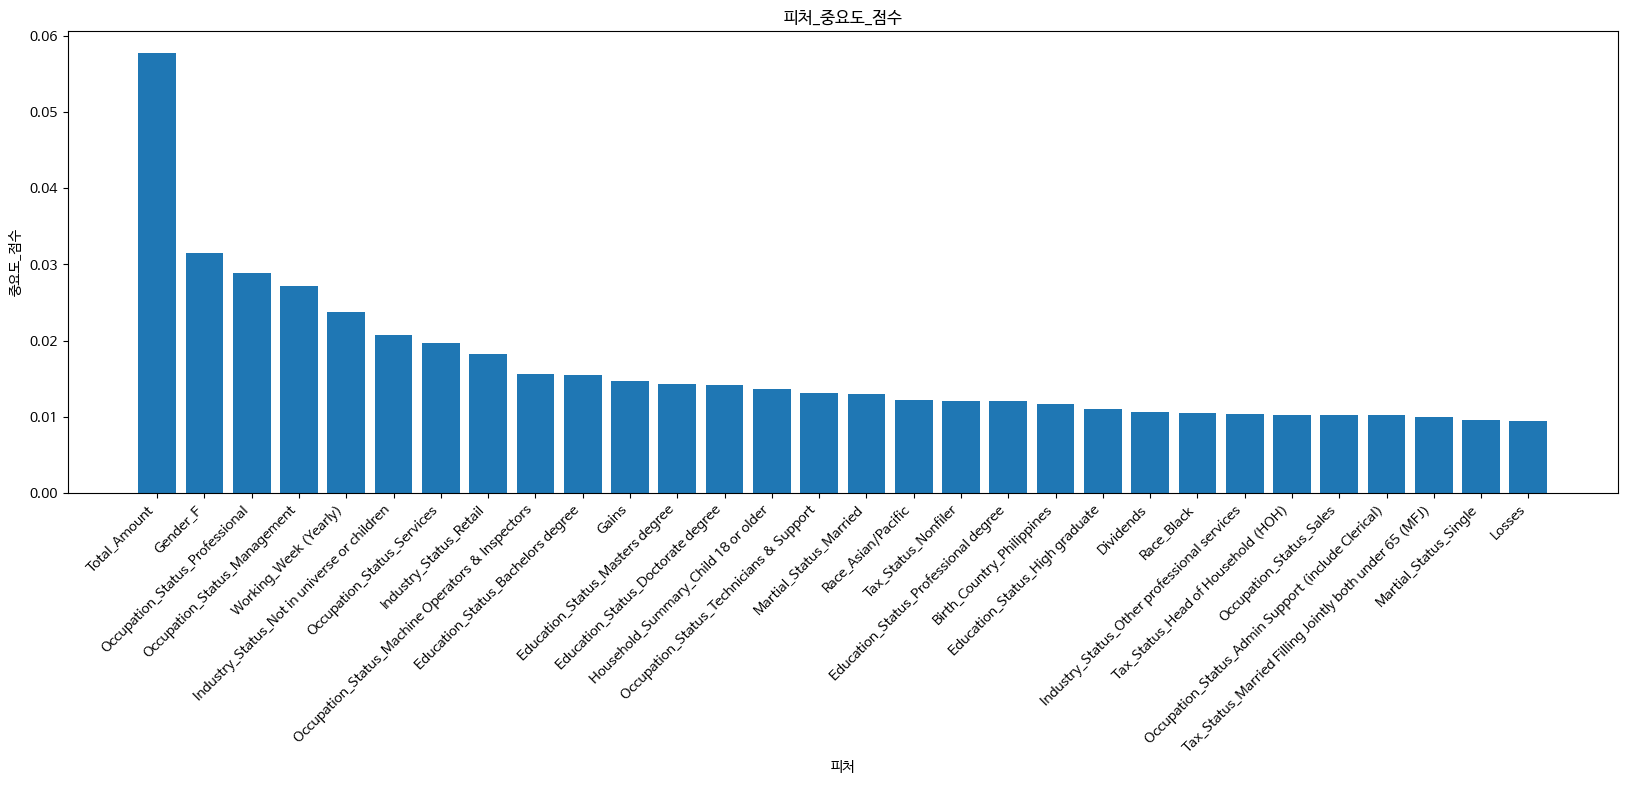

In [ ]:
# xgboost
# 특성 중요도를 기준으로 정렬된 인덱스 가져오기
sorted_indices = feature_importance.argsort()[::-1][:30]

# 정렬된 인덱스를 사용하여 선택된 특성 추출
selected_features = train_ft.columns[sorted_indices]

# 특성 중요도 시각화
plt.figure(figsize=(20, 6))
plt.bar(range(len(selected_features)), feature_importance[sorted_indices], tick_label=selected_features)
plt.title('피처_중요도_점수')
plt.xlabel('피처')
plt.ylabel('중요도_점수')
plt.xticks(rotation=45, ha='right')
plt.show()

- Total Amount
- Working_Week(Yearly)
- Dividends
- Age
- 이렇게 5가지 항목이 중요한 feature 뽑히는 것을 확인할 수 있음

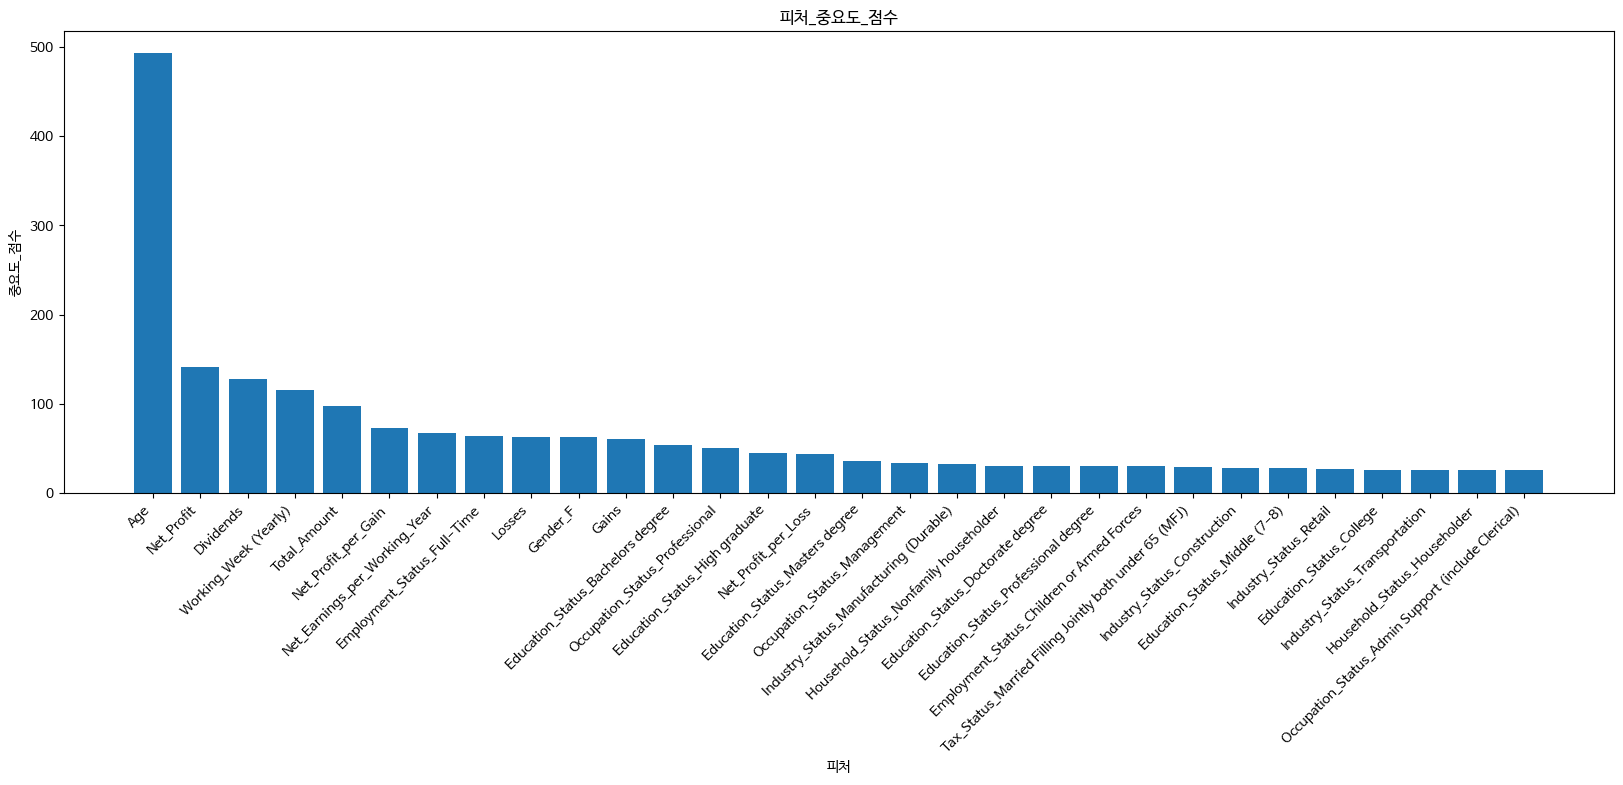

In [ ]:
# lgb_model
# 특성 중요도를 기준으로 정렬된 인덱스 가져오기
sorted_indices = feature_importance.argsort()[::-1][:30]

# 정렬된 인덱스를 사용하여 선택된 특성 추출
selected_features = train_ft.columns[sorted_indices]

# 특성 중요도 시각화
plt.figure(figsize=(20, 6))
plt.bar(range(len(selected_features)), feature_importance[sorted_indices], tick_label=selected_features)
plt.title('피처_중요도_점수')
plt.xlabel('피처')
plt.ylabel('중요도_점수')
plt.xticks(rotation=45, ha='right')
plt.show()

- Age
- Working_Week (Yearly)
- Dividends
- Net Profit
- Net_Earning_per_Working_Year
- Net_Profit_per_gain
- Losses
- Net_profit_per_Loss
- 8가지 항목이 모델에서 중요도가 높은 feature 이다.

# 실제 예측 시작

In [ ]:
# 예측 시작

train_tmp = train[(train['Income_Status'] == 'Unknown')]
test_tmp = test[(test['Income_Status'] == 'Unknown')]

# train_ft의 인덱스를 재설정
train_tmp = train_tmp.reset_index(drop = True)

# test_ft에 대한 인덱스를 재설정해주는 것이다.
test_tmp = test_tmp.reset_index(drop = True)

In [ ]:
# 여기에 붙여야 함

train_sample = train[(train['Income_Status'] == 'Unknown')].copy()
test_sample = test[(test['Income_Status'] == 'Unknown')].copy()

# train_ft의 인덱스를 재설정
train_sample = train_sample.reset_index(drop = True)

# test_ft에 대한 인덱스를 재설정해주는 것이다.
test_sample = test_sample.reset_index(drop = True)

In [ ]:
train_tmp = train_tmp.drop(columns=['ID', 'Income_Status','Income'])
test_tmp = test_tmp.drop(columns=['ID', 'Income_Status'])

train_tmp.shape,test_tmp.shape

((6026, 20), (2954, 20))

In [ ]:
train_sample = train_sample.drop(columns=['Income_Status'])
test_sample = test_sample.drop(columns=['Income_Status'])

train_sample.shape,test_sample.shape

((6026, 22), (2954, 21))

In [ ]:
# 원핫인코딩 실시

# 학습 데이터
tmp = pd.DataFrame(
    enc.transform(train_tmp[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

train_tmp = pd.concat([train_tmp,tmp],axis=1).drop(columns=cols)
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_tmp[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

test_tmp = pd.concat([test_tmp,tmp],axis=1).drop(columns=cols)

In [ ]:
train_tmp.shape, test_tmp.shape

((6026, 271), (2954, 271))

In [ ]:
# RobustScaler

train_scaled = scaler.transform(train_tmp)
test_scaled = scaler.transform(test_tmp)

train_data = pd.DataFrame(train_scaled, columns = train_tmp.columns)
test_data = pd.DataFrame(test_scaled, columns = test_tmp.columns)

train_data.shape,test_data.shape

((6026, 271), (2954, 271))

In [ ]:
feature_names = train_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
train_data.columns = feature_names_cleaned

In [ ]:
train_pred = xgb_model.predict(train_data)
train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
feature_names = test_data.columns.tolist()
feature_names_cleaned = [name.replace('[', '_').replace(']', '_').replace('<', '_') for name in feature_names]

# XGBClassifier를 적용하기 위해 feature의 name을 제가공 해주는 것이다.
test_data.columns = feature_names_cleaned

In [ ]:
test_pred = xgb_model.predict(test_data)
test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
test_pred.mean()

0.968855788761002

In [ ]:
train_sample['Income_Status'] = le.inverse_transform(train_pred)
train_sample.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income,Income_Status
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,425,Under Median
1,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,570,Under Median
2,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,0,Under Median
3,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,...,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,0,Under Median
4,TRAIN_00013,40,M,Elementary (1-4),Full-Time,52,Manufacturing (Durable),Machine Operators & Inspectors,White,Mexican (Mexicano),...,Foreign-born (Non-US Citizen),Mexico,Mexico,Mexico,Married Filling Jointly both under 65 (MFJ),0,0,0,800,Under Median


In [ ]:
test_sample['Income_Status'] = le.inverse_transform(test_pred)
test_sample.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
1,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0005,31,M,High Freshman,Full-Time,24,Construction,Transportation,White,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
3,TEST_0009,43,M,College,Full-Time,52,Transportation,Admin Support (include Clerical),Black,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median
4,TEST_0021,38,M,College,Choice Part-Time,52,Communications,Craft & Repair,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median


In [ ]:
# 하나의 데이터를 생성!
train_ft_2 = train[~(train['Income_Status'] == 'Unknown')]
test_ft_2 = test[~(test['Income_Status'] == 'Unknown')]

# train_ft의 인덱스를 재설정
train_ft_2 = train_ft_2.reset_index(drop = True)

# train_ft에 대한 target데이터 생성
target = train_ft_2['Income_Status'].copy()

# test_ft에 대한 인덱스를 재설정해주는 것이다.
test_ft_2 = test_ft_2.reset_index(drop = True)

# test_ft에 대한 target 데이터 (후에 검증을 위해 target을 이용하는 것이다.)
target_tmp = test_ft_2['Income_Status'].copy()

In [ ]:
train_ft_2.shape,test_ft_2.shape

((13974, 23), (7046, 22))

In [ ]:
train_sample.shape,test_sample.shape

((6026, 23), (2954, 22))

In [ ]:
train_ft_2 = train_ft_2.drop(columns=['Income_Status'])
test_ft_2 = test_ft_2.drop(columns=['Income_Status'])

train_ft_2.shape,test_ft_2.shape

((13974, 22), (7046, 21))

In [ ]:
train_ft_2['Income_Status'] = target
test_ft_2['Income_Status'] = target_tmp

train_ft_2.shape,test_ft_2.shape

((13974, 23), (7046, 22))

In [ ]:
train_ft = pd.concat([train_sample,train_ft_2])
test_ft = pd.concat([test_sample,test_ft_2])

train_ft.shape,test_ft.shape

((20000, 33), (10000, 32))

In [ ]:
train_ft = pd.concat([train_sample,train_ft_2]).sort_values(by = 'ID')
test_ft = pd.concat([test_sample,test_ft_2]).sort_values(by = 'ID')

train_ft.shape,test_ft.shape

((20000, 23), (10000, 22))

In [ ]:
train_ft.to_csv('train_data.csv', index=False)
test_ft.to_csv('test_data.csv', index=False)

In [ ]:
train_ft.to_csv(f'{DATA_PATH}train_data.csv', index=False)